In [58]:
import sys
#import regex
import pandas as pd
from fuzzywuzzy import fuzz

df_csv = pd.read_csv('recent_ContactInfo.csv')
print("Total count of records from csv ",len(df_csv))

# converting the username to uppercase since the username is in uppercase in the database
df_csv['username'] = df_csv['username'].str.upper()

df_csv_addr = df_csv[['username', 'Street', 'AddrLine2', 'StateZip']]
df_csv_email = df_csv[['username', 'email']]
df_csv_phone = df_csv[['username', 'Phone']]

df_csv_phone = df_csv.dropna(how='all', subset=['Phone'])
df_csv_Addr = df_csv_Addr.dropna(how='all', subset=['Street'])
df_csv_email = df_csv_email.dropna(how='all', subset=['email'])
print("Count records after dropping records with no address : ",len(df_csv_Addr))
print("Count records after dropping records with no email : ",len(df_csv_email))
print("Count records after dropping records with no phone : ",len(df_csv_phone))

Total count of records from csv  100
Count records after dropping records with no address :  100
Count records after dropping records with no email :  100
Count records after dropping records with no phone :  91


In [59]:
raw_eid = df_csv['username'].dropna()
eid = raw_eid.tolist()

In [ ]:
import cx_Oracle
connection = cx_Oracle.connect("xxxx/Zyyy@ea.y.z.com:1525/z.x.y.com")
cursor = connection.cursor()

df_addr_db = pd.DataFrame(columns = ['username','Street','Address2','City','State','Zip Code'])
for i in range(2):
    cursor.execute("select username, addr_line1, addr_line2, city, state, zip from main_table m, t_addresses a  where m.username = a.username AND m.id IN %s" % str(tuple(id)).replace(',)',')'))
    results = cursor.fetchall()
    df1 = pd.DataFrame(results, columns = ['username','Street','Address2','City','State','Zip Code'])
    df_addr_db = df_addr_db.append(df1,ignore_index=True)

df_edb = pd.DataFrame(columns = ['ID','Email'])
for i in range(2):
    cursor.execute("select ID, email_addr from main m, email_info e where m.ID = e.ID AND m.id IN %s" % str(tuple(eid)).replace(',)',')'))
    results = cursor.fetchall()
    df1 = pd.DataFrame(results, columns = ['ID','Email'])
    df_edb = df_edb.append(df1,ignore_index=True)
cursor.close()
connection.close()    

In [71]:
db_data = pd.read_csv('db_data.csv')

In [73]:
for i in range(len(df_csv)): 
    k = df_csv.loc[i,'Phone']
    k = str(k)
    #df_csv_phone.loc[i,'Phone'] = int(df_csv_phone.loc[i,'Phone'])   
    df_csv.loc[i,'Phone'] = k.replace("(","").replace(")","").replace("-","").replace("/","").replace(" ","")
    m = db_data.loc[i,'Phone']
    m = str(m)
    db_data.loc[i,'Phone'] = m.replace("(","").replace(")","").replace("-","").replace("/","").replace(" ","")
print(df_csv_phone.head(11), db_data.head(11))

         username                Name                          Street  \
0          GLEWIS  Anthony Thomas DVM              532 Michael Radial   
1   WALLSSAMANTHA     Valerie Barrera         91083 Christopher Field   
2       MELANIE05    Melissa Anderson    5324 Donna Station Suite 578   
3         NBECKER       Jason Kennedy              02930 Collins Dale   
4    WEAVERLAUREN       Thomas Robles                  1626 Love Ford   
5          GARY15     Taylor Martinez               307 Brian Viaduct   
6         ORHODES     Laura Maldonado              285 Nguyen Gardens   
7        DAVIDLEE       Brandon Myers       12378 Lisa Ways Suite 065   
8         FGAMBLE      William Chavez              Unit 4390 Box 1717   
10       ZJOHNSON        Mark Freeman  772 Harris Extension Suite 504   
11     MICHELLE77       Angela Fields                     USNV Gentry   

           AddrLine2  StateZip                     email           Phone  \
0   Port Connorville  NM 71043       anthony52@

In [75]:
addr_diff = pd.DataFrame()
df_email = pd.DataFrame()
df_phone = pd.DataFrame()

for i in range(len(df_csv)):
    flag = 0
    id_csv = df_csv_addr.iloc[i,0]
    csv_addr = df_csv_addr.iloc[i,1]
    db_addr = db_data.iloc[i,2]
   
    Token_Set_Ratio = fuzz.token_set_ratio(csv_addr,db_addr)
    if (Token_Set_Ratio > 77):
        flag = 0
    else:
        flag = 1
    
    if (flag == 1):
        addr_diff = addr_diff.append({'username':id_csv, 'DB_Address':db_addr,'CSV_Address':csv_addr}, ignore_index=True) 
    
    email_csv = df_csv.iloc[i,5]
    email_db = db_data.iloc[i,5]
    email_db = {email_db}
    email_csv = {email_csv}
    diff = (email_csv - email_db)
    if len(diff) > 0:
        #df_email = df_email.append({'EID':id_csv, 'Email':diff}, ignore_index=True)
        df_email = df_email.append({'username':id_csv, 'Email_csv':df_csv_email.iloc[i,1], 'Email_db':email_db}, ignore_index=True)

        
    id_csv = df_csv.iloc[i,0]
    #print(id_csv)
    ph_csv = df_csv.iloc[i,6]
    #print(ph_csv)
    ph_db = db_data.iloc[i,6]
    #print(ph_db) 
    ph_db = {ph_db}
    #print(ph_db, ph_csv)
    ph_csv = {ph_csv}
    diff1 = (ph_csv - ph_db)
    if len(diff1) > 0:
        df_phone = df_phone.append({'username':id_csv, 'phone_csv':df_csv.iloc[i,6], 'db_csv':db_data.iloc[i,6]}, ignore_index=True)
        
print(addr_diff)
print(df_email)
print(df_phone)

                       CSV_Address                  DB_Address  \
0          91083 Christopher Field     9402 Beverlyhill Street   
1     5324 Donna Station Suite 578            P. O. Box 202192   
2               02930 Collins Dale  12006 Captain Bailys Court   
3                   1626 Love Ford          3663 Behrman Place   
4                307 Brian Viaduct            #4 Lakewood Lane   
5               285 Nguyen Gardens          211 E Creek Street   
6        12378 Lisa Ways Suite 065         3916 Markridge Road   
7               Unit 4390 Box 1717            4606 19th Street   
8    88583 Bryan Centers Suite 295               P. O. Box 405   
9   772 Harris Extension Suite 504     12601 South Green Drive   
10          9942 Patrick Underpass               13323 Demeter   
11                620 Thomas Point        9056 Westbriar Drive   
12         8330 Beth Mall Apt. 321           137 East Gardenia   
13       1196 Yang Plaza Suite 624      2804 Rio Grande Street   
14        

In [76]:
df_addr = addr_diff
E_P_merge = pd.merge(df_email, df_phone, how='outer');
AEP_merged = pd.merge(df_addr, E_P_merge, how='outer');
#print(AEP_merged.head(3))
print(len(AEP_merged ))

40


In [78]:
df_AEP = AEP_merged[(AEP_merged.CSV_Address.notnull())&(AEP_merged.Email_csv.notnull())&(AEP_merged.phone_csv.notnull())]
print("AEP : ", len(df_AEP))

df_AE = AEP_merged[(AEP_merged.CSV_Address.notnull())&(AEP_merged.Email_csv.notnull())&(AEP_merged.phone_csv.isnull())]
print("AE : ", len(df_AE))

df_A = AEP_merged[(AEP_merged.CSV_Address.notnull())&(AEP_merged.Email_csv.isnull())&(AEP_merged.phone_csv.isnull())]
print("A : ", len(df_A))

df_AP = AEP_merged[(AEP_merged.CSV_Address.notnull())&(AEP_merged.Email_csv.isnull())&(AEP_merged.phone_csv.notnull())]
print("AP : ", len(df_AP))

df_EP = AEP_merged[(AEP_merged.CSV_Address.isnull())&(AEP_merged.Email_csv.notnull())&(AEP_merged.phone_csv.notnull())]
print("EP : ", len(df_EP))

df_P = AEP_merged[(AEP_merged.CSV_Address.isnull())&(AEP_merged.Email_csv.isnull())&(AEP_merged.phone_csv.notnull())]
print("P : ", len(df_P))

df_E = AEP_merged[(AEP_merged.CSV_Address.isnull())&(AEP_merged.Email_csv.notnull())&(AEP_merged.phone_csv.isnull())]
print("E : ", len(df_E))

AEP :  2
AE :  3
A :  14
AP :  5
EP :  7
P :  2
E :  7


The below Venn diagram shows the number of EID with changes in address, phone, number


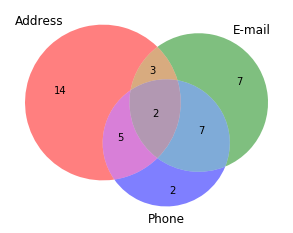

In [82]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

#venn3(subsets = (A,B,AB,C,AC,BC,ABC), set_labels = ('A', 'B', 'C'), alpha = 0.5);
print("The below Venn diagram shows the number of EID with changes in address, phone, number")
venn3(subsets = (len(df_A), len(df_E),len(df_AE),len(df_P), len(df_AP),  len(df_EP),len(df_AEP)), set_labels = ('Address', 'E-mail', 'Phone'), alpha = 0.5);
